# What is ensembling?

In general, ensembling is a technique of combining two or more algorithms of similar or dissimilar types called base learners. This is done to make a more robust system which incorporates the predictions from all the base learners. It can be understood as conference room meeting between multiple traders to make a decision on whether the price of a stock will go up or not.

Since all of them have a different understanding of the stock market and thus a different mapping function from the problem statement to the desired outcome. Therefore, they are supposed to make varied predictions on the stock price based on their own understandings of the market.

Now we can take all of these predictions into account while making the final decision. This will make our final decision more robust, accurate and less likely to be biased. The final decision would have been opposite if one of these traders would have made this decision alone.

You can consider another example of a candidate going through multiple rounds of job interviews. The final decision of candidate’s ability is generally taken based on the feedback of all the interviewers. Although a single interviewer might not be able to test the candidate for each required skill and trait. But the combined feedback of multiple interviewers usually helps in better assessment of the candidate.

## Types of ensembling

Some of the basic concepts which you should be aware of before we go into further detail are:

**Averaging:** It’s defined as taking the average of predictions from models in case of regression problem or while predicting probabilities for the classification problem.

Majority vote: It’s defined as taking the prediction with maximum vote / recommendation from multiple models predictions while predicting the outcomes of a classification problem.

Weighted average: In this, different weights are applied to predictions from multiple models then taking the average which means giving high or low importance to specific model output.


**Boosting:**

Boosting is a sequential technique in which, the first algorithm is trained on the entire dataset and the subsequent algorithms are built by fitting the residuals of the first algorithm, thus giving higher weight to those observations that were poorly predicted by the previous model.

It relies on creating a series of weak learners each of which might not be good for the entire dataset but is good for some part of the dataset. Thus, each model actually boosts the performance of the ensemble.

It’s really important to note that boosting is focused on reducing the bias. This makes the boosting algorithms prone to overfitting. Thus, parameter tuning becomes a crucial part of boosting algorithms to make them avoid overfitting.


Some examples of boosting are XGBoost, GBM, ADABOOST, etc.

**Stacking:**

In stacking multiple layers of machine learning models are placed one over another where each of the models passes their predictions to the model in the layer above it and the top layer model takes decisions based on the outputs of the models in layers below i

Practically speaking, there can be a countless number of ways in which you can ensemble different models. But these are some techniques that are mostly used:

**Bagging:** 

Bagging is also referred to as bootstrap aggregation. To understand bagging, we first need to understand bootstrapping. Bootstrapping is a sampling technique in which we choose ‘n’ observations or rows out of the original dataset of ‘n’ rows as well. But the key is that each row is selected with replacement from the original dataset so that each row is equally likely to be selected in each iteration. 



**“The whole is greater than the sum of its parts.” – Aristotle**

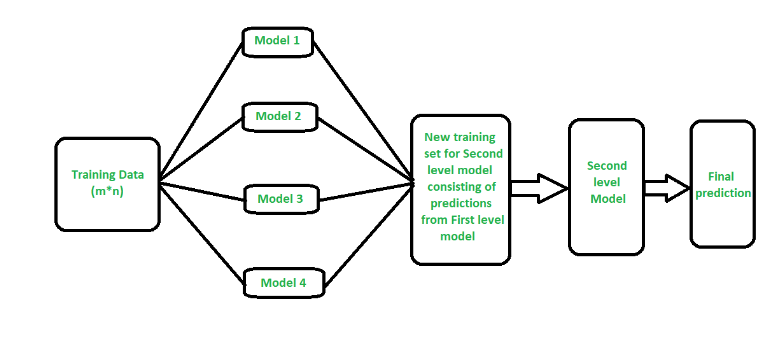
# Load Lib 

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score,recall_score
from sklearn.metrics import make_scorer,mean_absolute_error
from sklearn.metrics import mean_squared_error,classification_report,f1_score
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

#import tensorflow as tf 
#from tensorflow.keras import layers
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone,ClassifierMixin
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier,XGBRegressor
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
#from yellowbrick.cluster import KElbowVisualizer
#import smong 
import category_encoders as ce
import warnings
#import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
from typing import List, Optional, Union
import itertools
set_config(display='diagram')
warnings.filterwarnings('ignore')


# Load the data

In [2]:
%%time 
train = pd.read_csv('../input/GiveMeSomeCredit/cs-training.csv')
test = pd.read_csv('../input/GiveMeSomeCredit/cs-test.csv')
train.head(3)

CPU times: user 204 ms, sys: 60.6 ms, total: 265 ms
Wall time: 410 ms


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


# 1-Preprocessing

## Convert Dtypes :

In [3]:
# Convert Dtypes :
train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))
# Convert Dtypes :
test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
test[test.select_dtypes(['object','category']).columns] = test.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

## Reduce Memory

In [4]:
# Author : https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
train= reduce_mem_usage(train)
test= reduce_mem_usage(test)

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.29 MB
Decreased by 76.0%
Memory usage of dataframe is 9.29 MB
Memory usage after optimization is: 2.90 MB
Decreased by 68.7%


## X and Y

In [5]:
# Cardinality : 
# - RevolvingUtilizationOfUnsecuredLines :125728, high Outlier
# - DebtRatio :114194 , high Outlier 
# deal with outlier + bin 
PERCENTAGE = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio"]
# MonthlyIncome:13594 , high outlier +bin 
REAL= ["MonthlyIncome"]
# Can be considred as cat 
NUMERIC_DISCRET_low = ["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
Late_Pay_Cols = ['NumberOfTime30-59DaysPastDueNotWorse',
                 'NumberOfTimes90DaysLate',
                 'NumberOfTime60-89DaysPastDueNotWorse']
TARGET = ["SeriousDlqin2yrs"]

#also change the type for TARGET to categorical
#df[TARGET] = df[TARGET].astype('category')

In [6]:
y = train['SeriousDlqin2yrs']

## Imput before Descritaziation : 

### IterativeImputer


In [7]:
%%time 
param =  {   "verbosity": 0,
            #"objective": "binary:logistic",
            #"eval_metric": "auc",
            'random_state': 42,
            # regression
            'objective':'reg:squarederror', 
             'eval_metric': 'mae',
            #early_stopping_rounds=100 ,
            'gpu_id':0, 
            'predictor':"gpu_predictor",
            # use exact for small dataset.
            #"tree_method": "exact",
            # big data :
             'tree_method': 'gpu_hist',
            # defines booster, gblinear for linear functions.
             'booster': 'gbtree', 
            'lambda': 8.544792472633987e-07,
            'alpha': 0.31141671752487043,
            'subsample': 0.8779467596981366, 
            'colsample_bytree': 0.9759532762677546,
            'learning_rate': 0.008686087328805853, 
            'n_estimators': 6988,
            'max_depth': 9,
            'min_child_weight': 2, 
            'eta': 3.7603213457541647e-06,
            'gamma': 2.1478058456847449e-07,
            'grow_policy': 'lossguide'}
                

#model_xgb = XGBRegressor(
       #objective="mae",
 #   **xgb_params2)

numeric_transformer1 = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
numeric_transformer2 = Pipeline(
                            steps=[
                            #('imputer', SimpleImputer(strategy='median'
                             #                         ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )

pipe_xgbr1 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer1),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )
pipe_xgbr2 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer2),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )

CPU times: user 1.13 ms, sys: 15 µs, total: 1.14 ms
Wall time: 969 µs


In [8]:
%%time 
train=train.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
test=test.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
train_final= pd.concat( [train, test], axis=0) 
#testdf_income= train_final[train_final['MonthlyIncome'].isnull()==True]
traindf_income = train_final[train_final['MonthlyIncome'].isnull()==False]
y_income = traindf_income['MonthlyIncome']
X_income=traindf_income.drop(["MonthlyIncome"],axis=1)
pipe_xgbr1.fit(X_income, y_income)
train_income_missing=train[train['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
test_income_missing=test[test['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
train_predicted = pipe_xgbr1.predict(train_income_missing)
test_predicted = pipe_xgbr1.predict(test_income_missing)
train.loc[(train.MonthlyIncome.isnull()), 'MonthlyIncome'] = train_predicted
test.loc[(test.MonthlyIncome.isnull()), 'MonthlyIncome'] = test_predicted

CPU times: user 2min 10s, sys: 2.51 s, total: 2min 12s
Wall time: 2min 13s


In [9]:
%%time 
traindf_NumberOfDependents = train_final[train_final['NumberOfDependents'].isnull()==False]
y_NumberOfDependents = traindf_NumberOfDependents['NumberOfDependents']
X_NumberOfDependents=traindf_NumberOfDependents.drop(["NumberOfDependents"],axis=1)
pipe_xgbr2.fit(X_NumberOfDependents, y_NumberOfDependents)
train_NumberOfDependents_missing=train[train['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
test_NumberOfDependents_missing=test[test['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
train_predicted = pipe_xgbr2.predict(train_NumberOfDependents_missing)
test_predicted = pipe_xgbr2.predict(test_NumberOfDependents_missing)
train.loc[(train.NumberOfDependents.isnull()), 'NumberOfDependents'] = train_predicted
test.loc[(test.NumberOfDependents.isnull()), 'NumberOfDependents'] = test_predicted

CPU times: user 2min 36s, sys: 982 ms, total: 2min 37s
Wall time: 2min 37s


In [10]:
# Add bin data 
# initializing append_str
append_str = 'cat_'
# Append suffix / prefix to strings in list
num_features1=["RevolvingUtilizationOfUnsecuredLines", "DebtRatio","MonthlyIncome"]
num_features2=["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
cat_features1 = [append_str + sub for sub in num_features1]
cat_features2 = [append_str + sub for sub in num_features2]

# create the discretizer object with strategy quantile and 1000 bins
discretizer1 = KBinsDiscretizer(n_bins=40, encode='ordinal',strategy='quantile')
discretizer2 = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='quantile')

pipeline1 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer1)
    ])
# fit the discretizer to the train set
pipeline1.fit(train.loc[:,num_features1])
# apply the discretisation
train_cat1 = pipeline1.transform(train.loc[:,num_features1])
test_cat1 = pipeline1.transform(test.loc[:,num_features1])
train_df1=pd.DataFrame(train_cat1,columns=cat_features1).astype('category')
test_df1=pd.DataFrame(test_cat1,columns=cat_features1).astype('category')
train_final1= pd.concat( [train.loc[:,num_features1], train_df1], axis=1) 
test_final1= pd.concat( [test.loc[:,num_features1], test_df1], axis=1) 

pipeline2 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer2)
    ])
# fit the discretizer to the train set
pipeline2.fit(train.loc[:,num_features2])
# apply the discretisation
train_cat2 = pipeline2.transform(train.loc[:,num_features2])
test_cat2 = pipeline2.transform(test.loc[:,num_features2])
train_df2=pd.DataFrame(train_cat2,columns=cat_features2).astype('category')
test_df2=pd.DataFrame(test_cat2,columns=cat_features2).astype('category')
train_final2= pd.concat( [train.loc[:,num_features2], train_df2], axis=1) 
test_final2= pd.concat( [test.loc[:,num_features2], test_df2], axis=1) 

In [11]:
train_final= pd.concat( [train_final1, train_final2], axis=1) 
test_final= pd.concat( [test_final1, test_final2], axis=1) 

## Final X and y

In [12]:
# Pour le train test
target= "SeriousDlqin2yrs"
X = train_final# axis=1
X_test_final =test_final# axis=1

In [13]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 20 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines      101503 non-null  float16 
 1   DebtRatio                                 101503 non-null  float32 
 2   MonthlyIncome                             101503 non-null  float32 
 3   cat_RevolvingUtilizationOfUnsecuredLines  101503 non-null  category
 4   cat_DebtRatio                             101503 non-null  category
 5   cat_MonthlyIncome                         101503 non-null  category
 6   NumberOfDependents                        101503 non-null  float16 
 7   NumberOfTime60-89DaysPastDueNotWorse      101503 non-null  int8    
 8   NumberRealEstateLoansOrLines              101503 non-null  int8    
 9   NumberOfTimes90DaysLate                   101503 non-null  int8    
 10  NumberOf

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines      150000 non-null  float16 
 1   DebtRatio                                 150000 non-null  float32 
 2   MonthlyIncome                             150000 non-null  float32 
 3   cat_RevolvingUtilizationOfUnsecuredLines  150000 non-null  category
 4   cat_DebtRatio                             150000 non-null  category
 5   cat_MonthlyIncome                         150000 non-null  category
 6   NumberOfDependents                        150000 non-null  float16 
 7   NumberOfTime60-89DaysPastDueNotWorse      150000 non-null  int8    
 8   NumberRealEstateLoansOrLines              150000 non-null  int8    
 9   NumberOfTimes90DaysLate                   150000 non-null  int8    
 10  NumberOf

In [15]:
del train
del test 
del train_final
del test_final

In [16]:
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
cat_columns

Index(['cat_RevolvingUtilizationOfUnsecuredLines', 'cat_DebtRatio',
       'cat_MonthlyIncome', 'cat_NumberOfDependents',
       'cat_NumberOfTime60-89DaysPastDueNotWorse',
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object')

### Num Features



In [17]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns
num_columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object')

# FE

In [18]:
class MiniKmeansTransformerEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters = 11, encoder=ce.woe.WOEEncoder()):
        self.num_clusters = num_clusters
        self.encoder= encoder
        if self.num_clusters > 0:
            self.kmeans = MiniBatchKMeans(n_clusters=self.num_clusters, random_state=0)
    
    def fit(self, X, y=None):
        if self.num_clusters > 0:
            self.kmeans.fit(X)
            preds=self.kmeans.predict(X)
            preds=pd.DataFrame(preds, columns=['kmeans']).astype('category')
            self.encoder.fit(preds,y)
        return self
    
    def transform(self, X, y=None):
        pred_classes = self.kmeans.predict(X)
        pred_classes=pd.DataFrame(pred_classes, columns=['kmeans']).astype('category')
        pred_encoded = self.encoder.transform(pred_classes)
        return np.hstack((X, pred_encoded))
        #return pred_encoded

# Complete Pipe 

1. Features Engineer

1. Kmeans

1. Sparse

1. Poly

1. Scaler/Transformer

1. imput

1. Add bin data 

## Pipe : 


In [19]:
# Cat pipeline
categorical_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.woe.WOEEncoder()),#(Numerical Input, Categorical Output)
                        #('sparse_features', SparseInteractions(degree=2)),
                        #('reducedim',  SelectPercentile( mutual_info_classif, percentile=90))

                    ]
                    ) 
#Define vnum pipeline
numeric_transformer = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            #('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, num_columns),
               # ('categorical', categorical_transformer, cat_columns)
            ])

# Selected Models :

In [20]:
params_hgbc = {'l2_regularization': 2.940296779699346e-10, 
         'early_stopping': 'False',
         'learning_rate': 0.015318591316397998, 
         'max_iter': 1537, 
         'max_depth': 19, 
         'max_bins': 137, 
         'min_samples_leaf': 140,
         'max_leaf_nodes': 23}
model_hgbc = HistGradientBoostingClassifier(**params_hgbc)

 #Private Score 0.86875  Public Score 0.86245
pipe1_model_hgbc_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        #('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
        #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_hgbc)
    ]
)
pipe1_model_hgbc_woe_powertransformer2 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer),
            # ('dim_red', SelectKBest(f_regression, k=20)),
            #('Sparseinteractions', SparseInteractions(degree=2)),
             #('PolynomialFeatures', PolynomialFeatures(degree=2)),
            #('PCAreducer', PCA(n_components=0.8)),
            ('classifier',model_hgbc)
        ]
    )
# Private Score 0.86861  Public Score 0.86236
pipe1_model_hgbc_woe_powertransformer2 
#pipe1_model_hgbc_woe_powertransformer


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('kmeans',
                                                                   MiniKmeansTransformerEncoder()),
                                                                  ('polynominal_features',
                                                                   PolynomialFeatures())]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome'...
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(early_stopping='False',
                                                l2_regularization=2.940296779699346e-10,
                                                learning_rate=0.015318591316397998,
                                                max_bins=137, max_depth=19,
                                                max_iter=1537,
                                                max_leaf_nodes=23,
                                                min_samples_leaf=140))])

**2-CatBoost**

In [21]:
params_catboost = { "random_state": 42,
                    "loss_function":"Logloss",
                    "eval_metric":"AUC",
                    #"task_type" : "GPU",
                   'learning_rate': 0.03174251209279996,
                   'iterations': 1957,
                   'objective': 'CrossEntropy',
                   'colsample_bylevel': 0.05457006237382004,
                   'depth': 4,
                   'boosting_type': 'Ordered',
                   'bootstrap_type': 'MVS',
                   'verbose':False
                  }
model_catboost = CatBoostClassifier(
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             **params_catboost)
pipe1_model_catboost_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_catboost)
    ]
)
# Private Score 0.86903  Public Score 0.86217
#pipe1_model_catboost_woe_powertransformer

**-3 XGBR**

In [22]:
params_xgbr = { "verbosity": 0,
                "objective": "binary:logistic",
                "eval_metric": "auc",
                'random_state': 42,
                # regression
                #'objective':'reg:squarederror', 
                # 'eval_metric': 'mae',
                #early_stopping_rounds=100 ,
                'gpu_id':0, 
                'predictor':"gpu_predictor",
                # use exact for small dataset.
                #"tree_method": "exact",
                # big data :
                 'tree_method': 'gpu_hist',
                # defines booster, gblinear for linear functions.
               'booster': 'gbtree',
               'lambda': 0.05718879852112006,
               'alpha': 0.3744455966091751, 
               'subsample': 0.4600950043573827, 
               'colsample_bytree': 0.4826795171274075, 
               'learning_rate': 0.04028462871213848, 
               'n_estimators': 6258, 
               'max_depth': 3,
               'min_child_weight': 9,
               'eta': 1.0243140309668855e-07,
               'gamma': 0.0002882867942209271, 
               'grow_policy': 'lossguide'
              }
model_xgbr = XGBClassifier(
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             **params_xgbr)
pipe1_model_xgbr_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_xgbr)
    ]
)
#pipe1_model_xgbr_woe_powertransformer

**4-lgbm:**

In [23]:
params_lgbm =  {
               "objective": "binary",
                'random_state': 42,
                'metric': 'auc',
                "verbosity": -1,
                "boosting_type": "gbdt",
                "device": "gpu",
                #"early_stopping_rounds":100,
                'learning_rate': 0.005282912028625591, 
                'n_estimators': 1491,
                'lambda_l1': 2.5825901359648176e-05, 
                'lambda_l2': 4.490094872871969,
                'num_leaves': 76,
                'feature_fraction': 0.7099515479738928,
                'bagging_fraction': 0.8225459856082522,
                'bagging_freq': 3,
                'min_child_samples': 35
               }
model_lgbm = lgbm.LGBMClassifier(**params_lgbm,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             )
pipe1_model_lgbm_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_lgbm)
    ]
)
#pipe1_model_lgbm_woe_powertransformer

In [24]:
lgbm_param2={'learning_rate': 0.0018069834369607075,
                                 'max_depth': 8,
                                 #'max_features': 4,
                                 'min_samples_leaf': 47,
                                 #'min_samples_split': 389,
                                 'subsample': 0.8573598985000007,
                                 #'n_iter_no_change': 300,
                                 'n_estimators': 5000,
                                 'verbose': -1,
                                 'random_state': 42,
                                 'metric': 'auc',
                                "device_type" : "gpu",
                                'boosting_type': 'gbdt',
                                'tree_method': "gpu_hist"
                               }

model_lgbm2 = lgbm.LGBMClassifier(**lgbm_param2,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             )
pipe1_model_lgbm_woe_powertransformer2 = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_lgbm2)
    ]
)
#pipe1_model_lgbm_woe_powertransformer2

# Best Pipes : 


In [25]:
pipe1_lgbm_woe_powertransformer93 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer),
            ('reducedim',  SelectPercentile( f_classif, percentile=93)),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                             
                                               **lgbm_param2))
        ]
    )

pipe1_lgbm_woe_powertransformer = Pipeline(
                                steps=[
                                    ('preprocessor', preprocessor_woe_powertransformer),
                                    ('reducedim',  SelectPercentile( f_classif, percentile=98)),
                                    ('classifier',
                                     lgbm.LGBMClassifier( 
                                        #n_jobs=-1,
                                                                    
                                                                       **lgbm_param2))
                                ]
                                )
pipe1_lgbm_woe_powertransformer90 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer),
            ('reducedim',  SelectPercentile( f_classif, percentile=90)),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                           
                                               **lgbm_param2))
        ]
    )
pipe1_lgbm_woe_powertransformer95 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer),
            ('reducedim',  SelectPercentile( f_classif, percentile=95)),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                           
                                               **lgbm_param2))
        ]
    )
preprocessor_woe_powertransformer100 = ColumnTransformer(
                transformers=[
                    ('numerical', numeric_transformer, num_columns),
                   # ('categorical', categorical_transformer, cat_columns)
                ])
pipe_lgbm_woe_powertransformer100 = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer100),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',
         lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                         
                                           **lgbm_param2))
    ]
    ) 
## Pipe_12
#Define vnum pipeline
numeric_transformer_12 = Pipeline(
                                steps=[
                                ('imputer', SimpleImputer(strategy='median'
                                                          ,add_indicator=True)),
                                #('general_features',FeaturesEngineer()),
                                ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                                # Create an SelectKBest object to select features with two best ANOVA F-Values
                                #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                                ('polynominal_features', PolynomialFeatures(degree=2)),
                                ('kmeans',MiniKmeansTransformerEncoder()),
                                #('reducedim',  SelectPercentile(f_classif,percentile=90))
                                ]
                                )

preprocessor_woe_powertransformer_12 = ColumnTransformer(
                transformers=[
                    ('numerical', numeric_transformer_12, num_columns),
                   # ('categorical', categorical_transformer, cat_columns)
                ])
pipe1_lgbm_woe_powertransformer_12 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer_12),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                               
                                               **lgbm_param2))
        ]
    )
# Pipe 2: 
# Cat pipeline
categorical_transformer2 = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.woe.WOEEncoder()),#(Numerical Input, Categorical Output)
                        #('sparse_features', SparseInteractions(degree=2)),
                        #('reducedim',  SelectPercentile( mutual_info_classif, percentile=90))

                    ]
                    ) 
#Define vnum pipeline
numeric_transformer2 = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            #('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer2 = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer2, num_columns),
                ('categorical', categorical_transformer2, cat_columns)
            ])
pipe2_lgbm_woe_powertransformer = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer2),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                              
                                               **lgbm_param2))
        ]
    )
pipe2_model_catboost_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer2),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_catboost)
    ]
)

In [26]:
# Pipe 1
# Private Score 0.86914 Public Score 0.86245
pipe1_lgbm_woe_powertransformer95 
# Private Score 0.86911 Public Score 0.86230
pipe_lgbm_woe_powertransformer100  
# Private Score 0.86903  Public Score 0.86217
pipe1_model_catboost_woe_powertransformer
#Private Score 0.86875  Public Score 0.86245
pipe1_model_hgbc_woe_powertransformer
## Pipe_12
#  Private Score 0.86895  Public Score 0.86231
pipe1_lgbm_woe_powertransformer_12
# Private Score 0.86898 Public Score 0.86230
pipe2_lgbm_woe_powertransformer
# Private Score 0.86903  Public Score 0.86215
pipe2_model_catboost_woe_powertransformer  
best_pipes=[pipe1_lgbm_woe_powertransformer95,
            pipe1_lgbm_woe_powertransformer_12,
            pipe1_model_catboost_woe_powertransformer,
            #pipe1_model_hgbc_woe_powertransformer,
            pipe2_lgbm_woe_powertransformer,
            pipe2_model_catboost_woe_powertransformer
           ]

In [27]:
##### from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingCVClassifier

mlxtend_sclf1 = StackingCVClassifier(classifiers=best_pipes,use_probas=False,
                            meta_classifier=model_xgbr,cv=10,stratify=True,
                            random_state=42)

mlxtend_sclf2 = StackingCVClassifier(classifiers=best_pipes,use_probas=True,
                            meta_classifier=model_xgbr,cv=10,stratify=True,
                            random_state=42)

mlxtend_sclf3 = StackingCVClassifier(classifiers=best_pipes,use_probas=True,
                              use_features_in_secondary=True ,
                              meta_classifier=model_xgbr,cv=10,stratify=True,
                            random_state=42)
mlxtend_sclf32 = StackingCVClassifier(classifiers=best_pipes,use_probas=True,
                              use_features_in_secondary=True ,
                              meta_classifier=LogisticRegression(),cv=10,stratify=True,
                            random_state=42)
mlxtend_sclf4_pipe = StackingCVClassifier(classifiers=best_pipes,use_probas=True,
                              use_features_in_secondary=True ,
                              meta_classifier=model_xgbr,cv=10,stratify=True,
                            random_state=42)
mlxtend_sclf3

StackingCVClassifier(classifiers=[Pipeline(steps=[('preprocessor',
                                                   ColumnTransformer(transformers=[('numerical',
                                                                                    Pipeline(steps=[('imputer',
                                                                                                     SimpleImputer(add_indicator=True,
                                                                                                                   strategy='median')),
                                                                                                    ('scaler',
                                                                                                     PowerTransformer()),
                                                                                                    ('kmeans',
                                                                                                     MiniKmeansTransformerEncoder()),
                                                                                                    ('polynominal_features',
                                                                                                     PolynomialFeatures())]),
                                                                                    Index(['RevolvingUtilizationOfUnsecured...
                                                   learning_rate=0.04028462871213848,
                                                   max_delta_step=None,
                                                   max_depth=3,
                                                   min_child_weight=9,
                                                   missing=nan,
                                                   monotone_constraints=None,
                                                   n_estimators=6258,
                                                   n_jobs=None,
                                                   num_parallel_tree=None,
                                                   predictor='gpu_predictor',
                                                   random_state=42,
                                                   reg_alpha=None,
                                                   reg_lambda=None,
                                                   scale_pos_weight=None,
                                                   subsample=0.4600950043573827, ...),
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True)

In [28]:
#X=X.iloc[0:10000,:].copy()
#y=y.iloc[0:10000].copy()

# Tuning Stacking Process: 

In [29]:
###############################################################################
#                                  Get data                                 #
###############################################################################
X_train,X_test, y_train,  y_test = train_test_split(X, y,stratify=y, 
                                                       test_size=0.2,
                                                        random_state=42,
                                                        shuffle=True)
##############################################################################
#                               Good Ol' Classifiers                        #
###############################################################################
best_pipes
###############################################################################
#                             Stacking Classifier                          #
###############################################################################
# Initializing the StackingCV classifier
mlxtend_sclf2 = StackingCVClassifier(classifiers=best_pipes,use_probas=True,
                            meta_classifier=LogisticRegression(),cv=4,stratify=True,
                            random_state=42)

###############################################################################
#                        Putting classifiers in a dictionary                #
###############################################################################

# Create list to store classifiers
classifiers = {"pipe1":pipe1_lgbm_woe_powertransformer95,
            #"pipe2":pipe_lgbm_woe_powertransformer100,
            "pipe2": pipe1_lgbm_woe_powertransformer_12,
           # "pipe3":pipe1_model_catboost_woe_powertransformer,
           # "pipe5":pipe1_model_hgbc_woe_powertransformer,
            "pipe3":pipe2_lgbm_woe_powertransformer,
            "pipe4":pipe2_model_catboost_woe_powertransformer
           }




    ###############################################################################
    #                                Train classifiers                          #
    ###############################################################################
    # Train classifiers
    for key in classifiers:
        # Get classifier
        classifier = classifiers[key]

        # Fit classifier
        classifier.fit(X, y)

        # Save fitted classifier
        classifiers[key] = classifier


    ###############################################################################
    #                               Making predictions                          #
    ###############################################################################
    # Get results
    results = pd.DataFrame()
    for key in classifiers:
        # Make prediction on test set
        y_pred = classifiers[key].predict_proba(X_test)[:,1]

        # Save results in pandas dataframe object
        results[f"{key}"] = y_pred

    # Add the test set to the results object
    results["Target"] = y_test

 # Visualzing results   

    ###############################################################################
    #                               Visualzing results                         #
    ###############################################################################
    # Probability Distributions Figure
    # Set graph style
    sns.set(font_scale = 1)
    sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
                   "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
                   'ytick.color': '0.4'})

    # Plot
    f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 4)

    for key, counter in zip(classifiers, range(4)):
        # Get predictions
        y_pred = results[key]

        # Get AUCm
        auc = roc_auc_score(y_test, y_pred)
        textstr = f"AUC: {auc:.3f}"

        # Plot false distribution
        false_pred = results[results["Target"] == 0]
        sns.distplot(false_pred[key], hist=True, kde=False, 
                     bins=int(25), color = 'red',
                     hist_kws={'edgecolor':'black'}, ax = ax[counter])

        # Plot true distribution
        true_pred = results[results["Target"] == 1]
        sns.distplot(results[key], hist=True, kde=False, 
                     bins=int(25), color = 'green',
                     hist_kws={'edgecolor':'black'}, ax = ax[counter])


        # These are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)

        # Place a text box in upper left in axes coords
        ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                        verticalalignment = "top", bbox=props)

        # Set axis limits and labels
        ax[counter].set_title(f"{key} Distribution")
        ax[counter].set_xlim(0,1)
        ax[counter].set_xlabel("Probability")

    # Tight layout
    plt.tight_layout()
    # Save Figure
    plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

# Tuning the Meta-Classifier  

In [30]:
###############################################################################
#                         Tuning the Meta-Classifier                      #
###############################################################################
# Define parameter grid 
#paramssvc = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
 #         "meta_classifier__C": [1, 2],
  #        "meta_classifier__degree": [3, 4, 5],
   #     
params = {"meta_classifier__random_state": [42],
         "meta_classifier__solver": ['newton-cg'],
         "meta_classifier__max_iter": [10],
        #"meta_classifier__C": np.logspace(-4, 4, 10),
        #"meta_classifier__C": np.logspace(-4, 4, 10),
         "meta_classifier__C": [.001],
         #"meta_classifier__penalty":  ['l2', 'l1']
         "meta_classifier__penalty":  ['l2']
         }



    # Initialize GridSearchCV
    grid = GridSearchCV(estimator = mlxtend_sclf2, 
                        param_grid = params, 
                        cv = 3,
                        scoring = "roc_auc",
                        verbose = 0,
                        n_jobs = -1)

    # Fit GridSearchCV
    grid.fit(X_train, y_train)

    # Making prediction on test set
    y_pred = grid.predict_proba(X_test)[:,1]

    # Getting AUC
    auc = roc_auc_score(y_test, y_pred)

    # Print results
    print(f"The AUC of the tuned Stacking classifier is {auc:.3f}")

In [31]:
#grid.best_params_

# Stacking Different Combinations of Classifiers  

In [32]:
###############################################################################
#               Stacking Different Combinations of Classifiers            #
###############################################################################
# Classifier labels
classifier_labels = ["pipe1","pipe2","pipe3","pipe4"]

# Get all unique combinations of classifier with a set size greater than or equal to 2
combo_classifiers = []
for ii in range(2, len(classifier_labels)+1):
    for subset in itertools.combinations(classifier_labels, ii):
        combo_classifiers.append(subset)
# Stack, tune, and evaluate stack of classifiers
for combo in combo_classifiers:
    # Get labels of classifier to create a stack
    labels = list(combo)
     
    # Get classifiers
    classifier_combo = []
    for ii in range(len(labels)):
        label = classifier_labels[ii]
        classifier = classifiers[label]
        classifier_combo.append(classifier)
         
    # Initializing the StackingCV classifier
    sclf = StackingCVClassifier(classifiers = classifier_combo,
                                shuffle = False,
                                use_probas = True,
                                cv = 2,
                                meta_classifier = LogisticRegression(),
                                n_jobs = -1)
    
    # Initialize GridSearchCV
    grid = GridSearchCV(estimator = sclf, 
                        param_grid = params, 
                        cv = 2,
                        scoring = "roc_auc",
                        verbose = -1,
                        n_jobs = -1)
    
    # Fit GridSearchCV
    grid.fit(X_train, y_train)
    
    # Making prediction on test set
    y_pred = grid.predict_proba(X_test)[:,1]
    
    # Getting AUC
    auc = roc_auc_score(y_test, y_pred)
    
    # Print results
    print(f"AUC of stack {combo}: {auc:.3f}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tr

[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 11.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 11.9min finished


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
AUC of stack ('pipe1', 'pipe2'): 0.867


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tr

[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 11.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 11.6min finished


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
AUC of stack ('pipe1', 'pipe3'): 0.867


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tr

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/s

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tr

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/opt/cond

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
AUC of stack ('pipe1', 'pipe4'): 0.867


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tr

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-pack

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
AUC of stack ('pipe2', 'pipe3'): 0.867


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tr

[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 11.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 11.7min finished
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimi

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-pack

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
AUC of stack ('pipe2', 'pipe4'): 0.867


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tr

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-pack

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
AUC of stack ('pipe3', 'pipe4'): 0.867


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tr

[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 18.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 18.2min finished
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
AUC of stack ('pipe1', 'pipe2', 'pipe3'): 0.867


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value e

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tr

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-pack

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
AUC of stack ('pipe1', 'pipe2', 'pipe4'): 0.867


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tr

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-pack

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
AUC of stack ('pipe1', 'pipe3', 'pipe4'): 0.867


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tr

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-pack

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
AUC of stack ('pipe2', 'pipe3', 'pipe4'): 0.867


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tr

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-pack

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tr

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/n

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-pack

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-pack

AUC of stack ('pipe1', 'pipe2', 'pipe3', 'pipe4'): 0.868


In [33]:
import itertools
# Classifier labels
classifier_labels = ["pipe1","pipe2","pipe3"]

# Get all unique combinations of classifier with a set size greater than or equal to 2
combo_classifiers = []
for ii in range(2, len(classifier_labels)+1):
    for subset in itertools.combinations(classifier_labels, ii):
        combo_classifiers.append(subset)
# Stack, tune, and evaluate stack of classifiers
for combo in combo_classifiers:
    # Get labels of classifier to create a stack
    print(combo)

('pipe1', 'pipe2')
('pipe1', 'pipe3')
('pipe2', 'pipe3')
('pipe1', 'pipe2', 'pipe3')


    AUC of stack ('pipe1', 'pipe2'): 0.867
    AUC of stack ('pipe1', 'pipe3'): 0.867
    AUC of stack ('pipe1', 'pipe4'): 0.867
    AUC of stack ('pipe2', 'pipe3'): 0.867
    AUC of stack ('pipe2', 'pipe4'): 0.867
    AUC of stack ('pipe3', 'pipe4'): 0.867
    AUC of stack ('pipe1', 'pipe2', 'pipe3'): 0.867
    AUC of stack ('pipe1', 'pipe2', 'pipe4'): 0.867
    AUC of stack ('pipe1', 'pipe3', 'pipe4'): 0.867
    AUC of stack ('pipe2', 'pipe3', 'pipe4'): 0.867

# Conclusion: 

Ensemble learning works best when the base models are not correlated. For instance, you can train different models such as linear models, decision trees, and neural nets on different datasets or features. The less correlated the base models, the better. 

The idea behind using uncorrelated models is that each may be solving a weakness of the other. They also have different strengths which, when combined, will result in a well-performing estimator. For example, creating an ensemble of just tree-based models may not be as effective as combining tree-type algorithms with other types of algorithms. 

## Advantages and Disadvantages of Stacking

Like all other methods in machine learning, stacking has advantages and disadvantages. Here are some of the advantages of stacking:

    Stacking can yield improvements in model performance.
    Stacking reduces variance and creates a more robust model by combining the predictions of multiple models.

Keep in mind that stacking also has the following disadvantages:

    Stacked models can take significantly longer to train than simpler models and require more memory.
    Generating predictions using stacked models will usually be slower and more computationally expensive. This drawback is important to consider if you are planning to deploy a stacked model into production.

credit: 

https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840

https://www.dataquest.io/blog/introduction-to-ensembles/

https://scikit-learn.org/stable/modules/ensemble.html

https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/


https://mlfromscratch.com/model-stacking-explained/#/

http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

http://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/


https://www.kaggle.com/bannourchaker/7ensembling-stacking-averaging-scratchvssklearn/edit/run/73916270

https://www.kaggle.com/bannourchaker/averagingmodels

https://mlfromscratch.com/model-stacking-explained/#/

https://neptune.ai/blog/ensemble-learning-guide

https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

https://www.kaggle.com/prashant111/adaboost-classifier-tutorial

https://www.kaggle.com/bannourchaker/stacking/edit/run/75840835

https://www.kaggle.com/bannourchaker/8-ensembling-blending-scratchvsoop

Bagging:

https://vitalflux.com/bagging-classifier-python-code-example/

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

complete guide Stacking :

https://neptune.ai/blog/ensemble-learning-guide

https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

https://www.kaggle.com/prashant111/adaboost-classifier-tutorial